# Modeling Weather Data Points with Python


In [32]:
#import the packages
import math
import pandas as pd
import numpy as np
import os
import seaborn as sns
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression as LinReg


C:\Users\USER\AppData\Local\Temp\ipykernel_14288\3924235378.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
bycountry= pd.read_csv("GlobalLandTemperaturesByCountry.csv",
index_col=None)
bycountry.head(10)


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [3]:
#take a look at Nigeia
nigeria=bycountry.loc[bycountry['Country'] == "Nigeria"]
type(nigeria)
nigeria.infer_objects()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
378950,1856-01-01,24.367,1.082,Nigeria
378951,1856-02-01,25.827,1.621,Nigeria
378952,1856-03-01,28.494,1.015,Nigeria
378953,1856-04-01,29.001,0.985,Nigeria
378954,1856-05-01,28.093,1.198,Nigeria
...,...,...,...,...
380838,2013-05-01,29.259,0.748,Nigeria
380839,2013-06-01,27.782,0.579,Nigeria
380840,2013-07-01,26.620,0.295,Nigeria
380841,2013-08-01,25.135,0.307,Nigeria


In [4]:
#save the temperature into a separate variable to normalize it:
temp=nigeria['AverageTemperature']
temp=temp.dropna(how='any')


array([-1.3117291 , -0.50627938,  0.96504554, ...,  0.57225089,
       -0.06879882, -0.88804048])

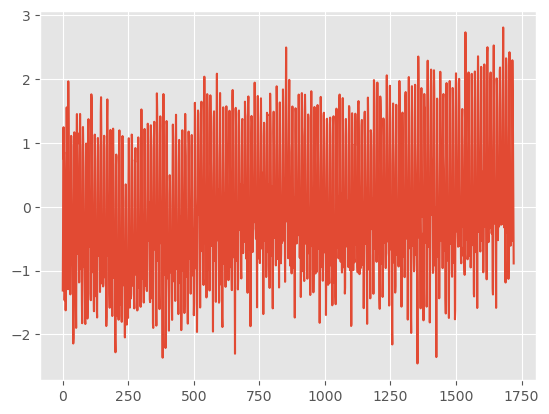

In [5]:
#let's preprocess the temperature to normalize it. And then plot the chart:
#pre-processing
scale=preprocessing.scale(temp)
plt.plot(scale)
scale

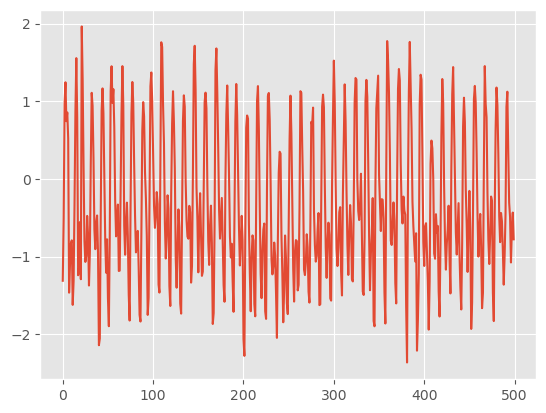

In [6]:
#let's get a small sample to see
scale
df=DataFrame(scale)
sample=df[0:500]
sample
plt.plot(sample)

RMSE: 0.696


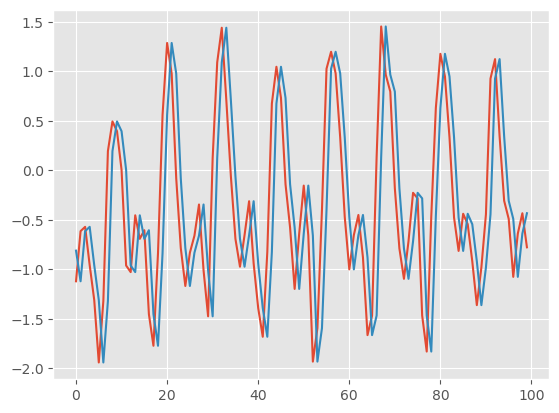

In [11]:
#now we can see the patterns
X = sample.values
train, test = X[0:-100], X[-100:]

# Walk-forward validation
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    # Make prediction
    predictions.append(history[-1])
    # Update observation
    history.append(test[i])

# Report performance
rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

# Line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()


RMSE: 0.775


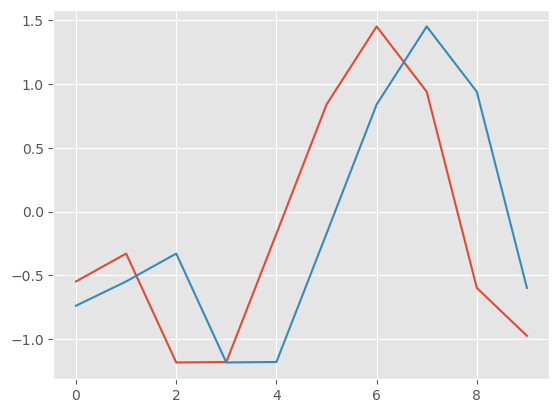

In [10]:
#a smaller sample of 70
sample2 = sample[0:70]
X2 = sample2.values
train2, test2 = X2[0:-10], X2[-10:]

# Walk-forward validation
history2 = [x for x in train2]
predictions2 = list()

for i in range(len(test2)):
    # Make prediction
    predictions2.append(history2[-1])
    # Update observation
    history2.append(test2[i])

# Report performance
rmse2 = math.sqrt(mean_squared_error(test2, predictions2))
print('RMSE: %.3f' % rmse2)

# Line plot of observed vs predicted
pyplot.plot(test2)
pyplot.plot(predictions2)
pyplot.show()



In this case, the RMSE is 0.775, which is way more than with our original case.

# Weather statistics by country
Let's generate a model to show the top 20 countries with the greatest temperature difference.

In [13]:
tempByCountry = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
countries = tempByCountry['Country'].unique()


In [14]:
#let's get the minimum and maximum temperature lists:
max_min_list = []

# Getting max and min temperatures
for country in countries:
    curr_temps = tempByCountry[tempByCountry['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))


In [17]:
# NaN cleaning
res_max_min_list = []
res_countries = []
for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])


In [18]:
# calculating the differences
differences = []
for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])


In [19]:
# sorting the result
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences,
res_countries), key=lambda pair: pair[0], reverse=True)))

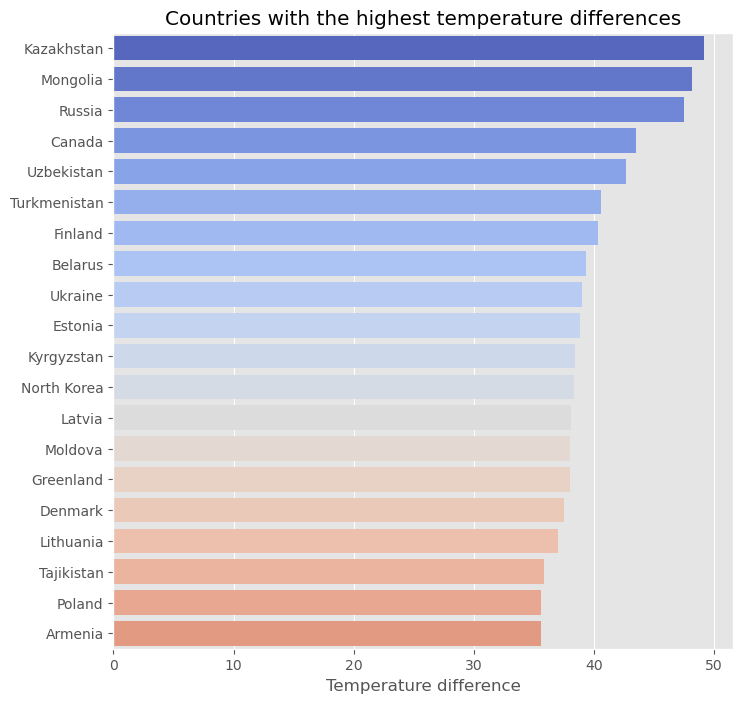

In [23]:
# Plotting the chart
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:20], y=res_countries[:20], palette=sns.color_palette("coolwarm", 25), ax=ax)
texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")
plt.show()



Linear regression to predict the temperature of a city

In [24]:
#reading the file and collecting only the timestamp and the year
dframe= pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df_ld = dframe[dframe['City']=='London']
df_ld= df_ld.iloc[:, :2]


In [25]:
df_ld.head(10)

,dt,AverageTemperature
128607,1743-11-01,7.541
128608,1743-12-01,NaN
128609,1744-01-01,NaN
128610,1744-02-01,NaN
128611,1744-03-01,NaN
128612,1744-04-01,8.296
128613,1744-05-01,10.966
128614,1744-06-01,14.522
128615,1744-07-01,15.964
128616,1744-08-01,NaN


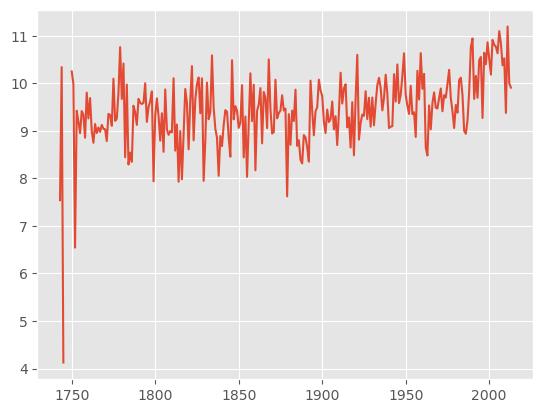

In [27]:
a = df_ld['dt'].apply(lambda x: int(x[0:4]))
grouped = df_ld.groupby(a).mean()
grouped.head(10)
#plotting the data
plt.plot(grouped['AverageTemperature'])
plt.show()


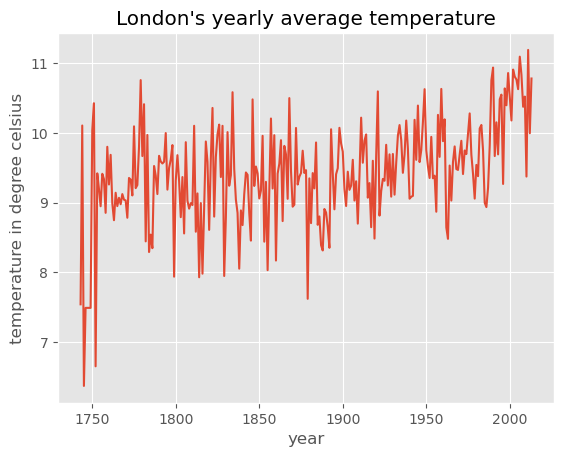

In [31]:
#We can see there are several blank spaces due to the NaN blocks in the data. We can fix the anomalies by filling each of the NaN blocks with its preceding block value:
#Plotting the fixed data
df_ld['AverageTemperature'] = df_ld['AverageTemperature'].fillna(method =
'ffill')
grouped = df_ld.groupby(a).mean()
plt.plot(grouped['AverageTemperature'])
plt.xlabel('year')
plt.ylabel('temperature in degree celsius')
plt.title('London\'s yearly average temperature')
plt.show()


From the chart it can be seen that the Average Temperature seems to be increasing for the most part.

In [33]:
#Reshape the index of 'grouped' i.e. years
x= grouped.index.values.reshape(-1,1)
#obtaining values of temperature
y = grouped['AverageTemperature'].values

In [35]:
#Using linear regression and finding accuracy of our prediction
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
Accuracy = str(reg.score(x,y))
print(Accuracy)

0.20246271444396924


The accuracy printed in this case is 0.20246271444396924. Let's plot the temperature data with years to fit the model

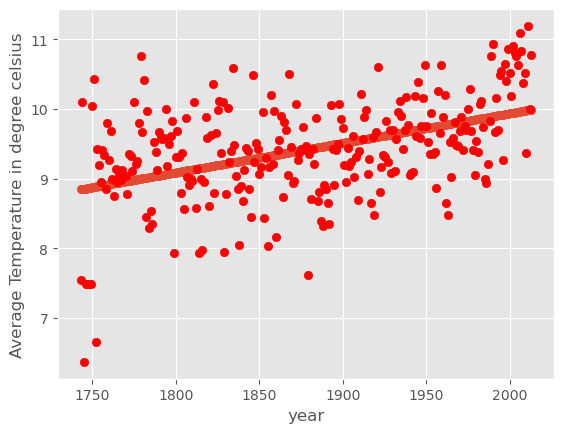

In [36]:
#plotting data along with regression
plt.scatter(x=x, y=y_preds)
plt.scatter(x=x,y=y, c='r')
plt.ylabel('Average Temperature in degree celsius')
plt.xlabel('year')
plt.show()

 let's use the model to predict future temperature values

In [42]:
#finding future values of temperature
future_year = 2024

future_data = np.array([[future_year]])

# Use the predict method
predicted_temperature = reg.predict(future_data)

print(f"Predicted temperature for the year {future_year}: {predicted_temperature[0]}°C")


Predicted temperature for the year 2024: 10.039187069495695°C
